<a href="https://colab.research.google.com/github/sayuri-pudding/Drive_BUNNSEKI/blob/main/2nd_round_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#日本語をグラフに書くためのおまじない　1/2
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 14.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f29f730581d90b42229e27e72ff12630e777156a3d5d16a3d8174dd20bc01d65
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
#日本語をグラフに書くためのおまじない2/2
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
#配列定義
member = [[[]for j in range(35)] for j in range(28)]
for i in range(28):
  member[i][0]=i
print(member)

member_speed=[[[]for j in range(40)] for j in range(26)]
member_time=[[[]for j in range(40)] for j in range(26)]
member_handle=[[[]for j in range(40)] for j in range(26)]
member_handle540=[[[]for j in range(120)] for j in range(26)]


[[0, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [1, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [2, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [3, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [4, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [5, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [6, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [7, [], [], 

In [ ]:
#便利グッズ
#プロット、ラベルの提示場所指定
import matplotlib.pyplot as plt
import os
import glob

#エラー除去
def path_data(path):
  p=0
  da = glob.glob(path +'*.csv')
  data=sorted(da, key=lambda s: int(re.findall(r'\d+', s)[-6]))
  k=[i for i ,x in enumerate(data) if "error" in x ]
  for i in k:
    del data[i-p]
    p=p+1
  return data

#これは引数が1つの4試行ごとに分けてくれる素敵な関数
ar4=[]
def times4(ar):
  ar4.clear()
  span=5
  for s in range(1,7):
    count=0
    for i in range((s-1)*span,s*span):
      count +=ar[i]
    ar4.append(count/span)
times4(member[0][4])
print(ar4)


[10.0, 10.0, 10.6, 8.6, 8.4, 9.2]


In [ ]:
#修正舵回数
#option all(全長),carve(カーブ中),after(カーブ後) 
#scale tilt(傾き変化でカウント) doremi(音階変化でカウント)
import csv
import numpy as np
import math
def change_num(file,option,scale,groupid,id):
  #ファイルを開く
  csv_file=open(file,encoding = "ISO-8859-1")
  #取り出す
  f=csv.reader(csv_file)
  # a=file.split('/')[5]
  # member[id][1]=groupid
  # member[id][2]=a
  # 配列入れまくり
  next(f)
  speed.clear()
  time.clear()
  handle.clear()
  accel.clear()
  abshandle.clear()
  abshandle_carve.clear()
  abshandle_after.clear()
  for row in f:
    if row and len(row)>11:
      speed.append(float(row[4]))
      disx.append(float(row[5]))
      disz.append(float(row[7]))
      time.append(float(row[0]))
      h=0
      h=float(row[11])
      #ｈandle=ハンドルの値（小数）
      handle.append(h)
      h=abs(h)*540
      #abshandle=ハンドルの値abs表示
      abshandle.append(h)
      #ドレミ値（90°を７で割った数）
      doremi.append(int(h/(90/7)))
      accel.append(float(row[12]))
  
  sa=0
  dist.clear()

  for i in range(len(disx)-1):
    x_sa=0
    z_sa=0
    x_sa=disx[i+1]-disx[i]
    z_sa=disz[i+1]-disz[i]
    sa+=abs(x_sa)+abs(z_sa)
    dist.append(sa)
  #横が走行距離で、縦がアクセルのグラフを出したいとき
  # accel.pop(-1)
  # plt.plot(dist,accel)
  # plt.show()

  # print(str(member[id][2])+"さんの"+str(sum(abshandle)/540))
  #maxmin=最大限回している時のインデックス
  maxmin=abshandle.index(max(abshandle))
  #カーブ中のインデックス、カーブ後のインデックスを定義-------------------------
  a=0
  for i in range(len(disx)):
    a=a+1
    if abs(disx[i])<=64 and abs(disz[i])>=60 and abs(disz[i])<=124:
      carve_index.append(a)
    if abs(disx[i])>64:
      after_index.append(a)
  #カーブ中のインデックス、カーブ後のabshandle-------------------------
  #abshandle_carveはカーブ中のabs表示されたハンドル値
  #abshandle_afterはカーブ後のabs表示されたハンドル値
  for s in range(len(disx)):
    if s in carve_index:
      abshandle_carve.append(abshandle[s])
      # print("中"+str(abshandle[s]))
    if s in after_index:
      abshandle_after.append(abshandle[s])
      # print("後"+str(abshandle[s]))
  all_abshandle.append(copy.deepcopy(abshandle))
  # print(str(len(abshandle))+"個の長さのやつ入れます。allは"+str(len(all_abshandle))+"個になりました。")

  #scaleがtiltだったら------------------------------
  if scale=='tilt':
    if option=='all':
      for i in range(len(time)-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='carve':
      for i in range(carve_index[0]-1,carve_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='after':
      for i in range(after_index[0]-1,after_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))  
    
  #傾きから0とる
    only=[]
    only=([i for i in angular_velocity if i != 0])
  #カウントする
    count=0
    for i in range(len(only)-1):
      #もしマイナスの次、プラスになったら、カウント
      if only[i]<0:
        if only[i+1]>0:
          count=count+1
      #もしプラスの次、マイナスになったら、カウント
      if only[i]>0:
        if only[i+1]<0:
          count=count+1
  #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    by_tilt1.append(count)


  #scaleがdoremiだったら------------------------------
  if scale=='doremi':
    correction_num=0
    #前半
    for i in range(0, maxmin-1):
      if doremi[i]-doremi[i+1]>0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #ターニングポイント
    #後半
    for i in range(maxmin+1,len(abshandle)-1):
      if doremi[i]-doremi[i+1]<0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    by_doremi1.append(correction_num)

  a_c=0
  for i in range(len(accel)-1):
    # print(accel[i])
    if accel[i]==0:
      if accel[i+1]>0:
        # print("アクセルが踏まれます。")
        a_c+=1
  accel_count.append(a_c)

  #まずアクセルの値を時間で微分した配列をつくる
  a_c_t=0
  for i in range(len(accel)-1):
    a=(accel[i+1]-accel[i])/(time[i+1]-time[i])
    accel_time.append(a)

  for i in range(len(accel_time)-1):
    # print(accel_time[i])
    if accel_time[i]==0:
      if accel_time[i+1]>0:
        # print(str(time[i])+"0から増えます"+str(a_c_t))
        a_c_t+=1
  accel_count_time.append(a_c_t)
  accel_time.clear()
  angular_velocity.clear()

  vary=0
  vary2=0
  vary3=0
  #中心からずれた値
  for i in range(len(disz)):
    #最初の150_m
    if disz[i]<160:
      vary+=abs(disx[i])
    #途中のカーブ
    if disz[i]>160 and disx[i]<64:
      v=(64-disx[i])*(64-disx[i])+(disz[i]-160)*(disz[i]-160)
      va=math.sqrt(v)
      var=abs(va-64)
      vary2+=var
    #最後の150m
    if disx[i]>64:
      vary3+=abs(disz[i]-224)
  vary_count.append(vary+vary2+vary3)

  #スピードの標準偏差
  speed_h=[]
  mean=0
  for i in range(len(speed)):
    if disz[i]>110:
      speed_h.append(speed[i])
  mean=np.average(speed_h)
  speed_std.append(np.std(speed_h)/mean)

  disx.clear()
  disz.clear()
  dist.clear()
  carve_index.clear()
  after_index.clear()
  doremi.clear()

In [ ]:
import glob
import csv
import re
import matplotlib.pyplot as plt

#初期化
handle=[]
time=[]
speed=[]
angular_velocity=[]
counter=[]

maxmin=0
abshandle=[]
abshandle_carve=[]
abshandle_after=[]
doremi=[]
  
disx=[]
disz=[]
dist=[]
carve_index=[]
after_index=[]
member_path=[]

accel=[]
accel_time=[]
accel_count=[]

vary_count=[]


#関口！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/関口/1/'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/関口/2/'
member_path.append([file_path1,file_path2])


for id,file_path in enumerate(member_path):
  a=file_path[0].split('/')[7]
  member[id][1]=a #名前
  member[id][2]=file_path[0]
  member[id][3]=file_path[1]

  #1セット目の分析
  #pathからdata配列にする
  data=path_data(file_path[0])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  all_abshandle=[]

  for c,i in enumerate(data):  
    change_num(i,option='all',scale='tilt',groupid=file_path[0],id=id)
  member[id][4]=by_tilt1
  member[id][5]=accel_count
  member[id][6]=accel_count_time
  member[id][7]=vary_count
  member[id][8]=speed_std
  member[id][16]=all_abshandle

  #2セット目の分析
  #pathからdata配列にする
  data=path_data(file_path[1])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  all_abshandle=[]

  for c,i in enumerate(data):  
    change_num(i,option='all',scale='tilt',groupid=file_path[1],id=id)
  member[id][10]=by_tilt1
  member[id][11]=accel_count
  member[id][12]=accel_count_time
  member[id][13]=vary_count
  member[id][14]=speed_std
  member[id][17]=all_abshandle
for i in range(1):
  for s in range(18):
    print(member[i][s])  


0
関口
/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/関口/1/
/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/関口/2/
[9, 17, 13, 7, 4, 7, 5, 7, 11, 20, 12, 16, 9, 9, 7, 8, 11, 9, 7, 8, 10, 9, 9, 9, 5, 8, 12, 12, 9, 5, 14]
[2, 3, 3, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1]
[18, 9, 10, 7, 11, 8, 6, 13, 11, 16, 17, 7, 19, 27, 8, 21, 5, 6, 6, 14, 12, 7, 16, 13, 5, 11, 12, 10, 15, 22, 16]
[4224.093973887099, 7553.8872810211105, 4291.760922457181, 4152.653933360627, 6679.1375028558505, 6421.377685498166, 6769.783520539051, 4048.2026653555695, 4360.4211134974, 4417.169897386999, 9149.006229364302, 8356.694237538139, 5412.746525705363, 5125.93318060888, 5814.76949590237, 8884.300150785582, 4786.45626880997, 4863.59203547184, 4308.657765220699, 9000.25408667159, 7932.755077356171, 9434.986028497002, 4609.663842179925, 8860.157903499692, 7932.839995590643, 7594.871759829741, 8382.837877889398, 4728.4405654537195, 4239.959467014031, 10214.541996771812, 504

ドレミハンドル


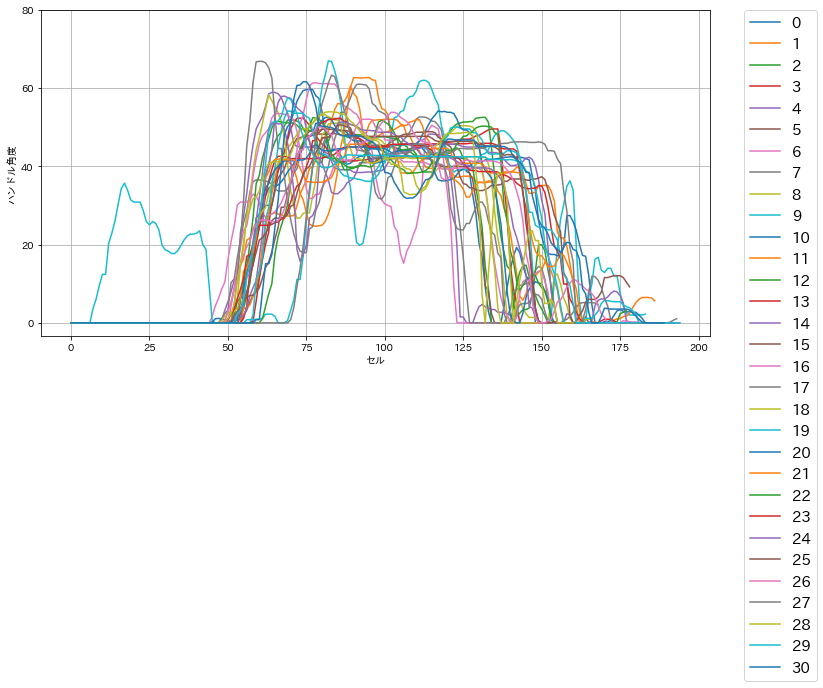

通常ハンドル


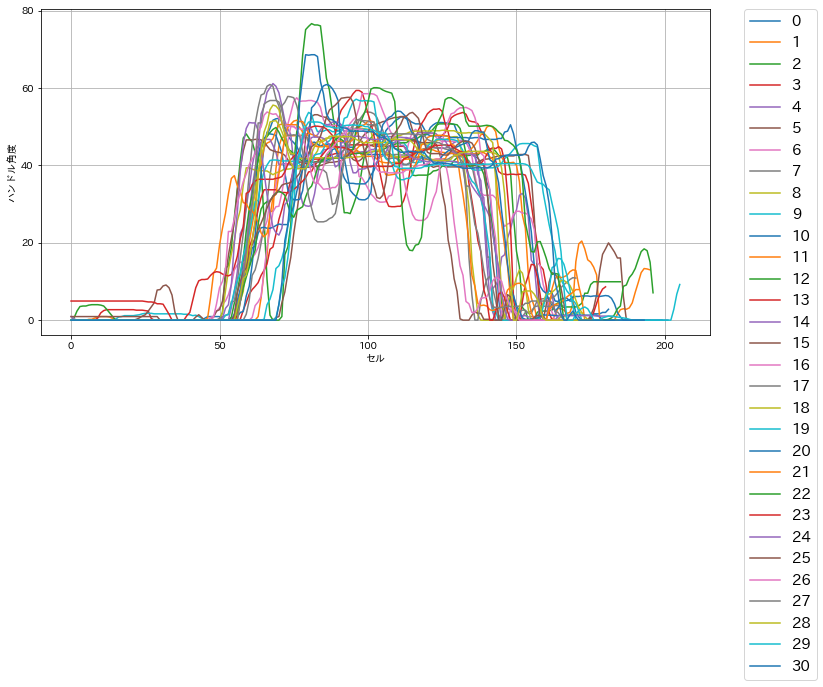

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)

print("ドレミハンドル")
for i in range(len(member[0][16])):
  plt.plot(member[0][16][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.xlabel("セル")
plt.ylabel("ハンドル角度")
plt.grid(True)
plt.yticks([0,20,40,60,80])
plt.show()

print("通常ハンドル")
for i in range(len(member[0][17])):
  plt.plot(member[0][17][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.xlabel("セル")
plt.ylabel("ハンドル角度")
plt.grid(True)
plt.yticks([0,20,40,60,80])

plt.show()

[9, 17, 13, 7, 4, 7, 5, 7, 11, 20, 12, 16, 9, 9, 7, 8, 11, 9, 7, 8, 10, 9, 9, 9, 5, 8, 12, 12, 9, 5, 14]
[11, 19, 15, 10, 12, 11, 11, 8, 7, 19, 17, 13, 6, 10, 13, 9, 6, 15, 9, 11, 13, 15, 14, 10, 9, 7, 11, 11, 8, 13, 14]


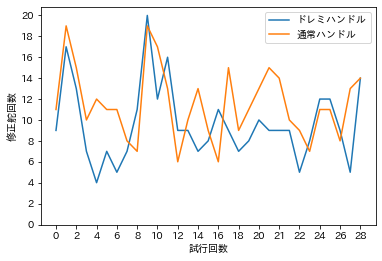

ドレミハンドル9.933333333333334
通常ハンドル11.9


In [ ]:
print(member[0][4])
print(member[0][10])
plt.plot(member[0][4],label="ドレミハンドル")
plt.plot(member[0][10],label="通常ハンドル")
plt.legend()
plt.xlabel("試行回数")
plt.ylabel("修正舵回数")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],[0,2,4,6,8,10,12,14,16,18,20,21,22,24,26,28,30])
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

print("ドレミハンドル"+str(sum(member[0][4])/30))
print("通常ハンドル"+str(sum(member[0][10])/30))

[9, 17, 13, 7, 4, 7, 5, 7, 11, 20, 12, 16, 9, 9, 7, 8, 11, 9, 7, 8, 10, 9, 9, 9, 5, 8, 12, 12, 9, 5, 14]
[11, 19, 15, 10, 12, 11, 11, 8, 7, 19, 17, 13, 6, 10, 13, 9, 6, 15, 9, 11, 13, 15, 14, 10, 9, 7, 11, 11, 8, 13, 14]
[10.0, 10.0, 10.6, 8.6, 8.4, 9.2]
[13.4, 11.2, 11.8, 10.0, 12.2, 10.0]
ドレミハンドルの上達度0.8800000000000001
通常ハンドルの上達度0.9024390243902438
      0
0  10.0
1   8.8
2  12.3
3  11.1


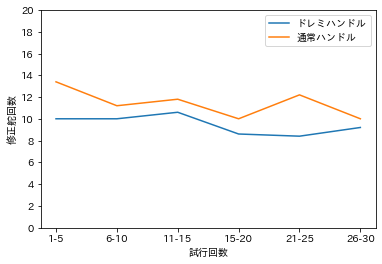

In [ ]:
import pandas as pd
exportlist=[]

print(member[0][4])
print(member[0][10])

times4(member[0][4])
print(ar4)

doremi_first=(ar4[0]+ar4[1])/2
doremi_last=(ar4[4]+ar4[5])/2

plt.plot(ar4,label="ドレミハンドル")

times4(member[0][10])
print(ar4)
nodoremi_first=(ar4[0]+ar4[1])/2
nodoremi_last=(ar4[4]+ar4[5])/2

print("ドレミハンドルの上達度"+str(doremi_last/doremi_first))
print("通常ハンドルの上達度"+str(nodoremi_last/nodoremi_first))
exportlist.append(doremi_first)
exportlist.append(doremi_last)
exportlist.append(nodoremi_first)
exportlist.append(nodoremi_last)
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
# df.T.to_excel('関口.xlsx', sheet_name='new_sheet_name');
print(df)

plt.plot(ar4,label="通常ハンドル")

plt.legend()
plt.xlabel("試行回数")
plt.ylabel("修正舵回数")
plt.xticks([0,1,2,3,4,5],["1-5","6-10","11-15","15-20","21-25","26-30"])
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()



**ーーーーーーーーーーーーーーーーーーーーーーさやちゃんーーーーーーーーーーーーーーーーーーーーー**

---



In [ ]:
import glob
import csv
import re
import matplotlib.pyplot as plt
import copy

#初期化
handle=[]
time=[]
speed=[]
angular_velocity=[]
counter=[]

maxmin=0
abshandle=[]
abshandle_carve=[]
abshandle_after=[]

  
disx=[]
disz=[]
dist=[]
carve_index=[]
after_index=[]
member_path=[]

accel=[]
accel_time=[]
accel_count=[]

vary_count=[]
all_abshandle=[]


#高野！！！！！！！！！！
#0はベース走行
#1は練習走行
#2はテスト走行
file_path0 = '/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/TAKANO/０/'
file_path1 = '/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/TAKANO/１/'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/TAKANO/2/'
member_path.append([file_path0,file_path1,file_path2])


for id,file_path in enumerate(member_path):
  a=file_path[0].split('/')[7]
  member[id][1]=a #名前
  member[id][2]=file_path[0]
  member[id][3]=file_path[1]
  data=path_data(file_path[2])

  #0セット目(ベース走行)の分析
  #pathからdata配列にする
  data=path_data(file_path[0])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  all_abshandle=[]

  for c,i in enumerate(data):  
    change_num(i,option='all',scale='tilt',groupid=file_path[0],id=id)

  member[id][4]=by_tilt1
  member[id][5]=accel_count
  member[id][6]=accel_count_time
  member[id][7]=vary_count
  member[id][8]=speed_std 
  member[id][9]=all_abshandle



  #1セット目（練習走行）の分析
  #pathからdata配列にする
  data=path_data(file_path[1])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  all_abshandle=[]

  for c,i in enumerate(data):  
    change_num(i,option='all',scale='tilt',groupid=file_path[1],id=id)
  member[id][10]=by_tilt1
  member[id][11]=accel_count
  member[id][12]=accel_count_time
  member[id][13]=vary_count
  member[id][14]=speed_std
  member[id][15]=all_abshandle

  #2セット目(テスト走行)の分析
  #pathからdata配列にする
  data=path_data(file_path[2])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  all_abshandle=[]

  for c,i in enumerate(data):  
    change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][16]=by_tilt1
  member[id][17]=accel_count
  member[id][18]=accel_count_time
  member[id][19]=vary_count
  member[id][20]=speed_std
  member[id][21]=all_abshandle
for i in range(1):
  for s in range(22):
    print(s,member[i][s])  

0 0
1 TAKANO
2 /content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/TAKANO/０/
3 /content/drive/MyDrive/Colab Notebooks/第2ラウンド/プレ/TAKANO/１/
4 [13, 21, 19, 16, 17, 11, 12, 19, 18, 30, 20]
5 [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
6 [9, 6, 7, 5, 7, 6, 2, 5, 2, 8, 5]
7 [8066.4279779826975, 8709.33526443374, 8219.55360016, 14311.564924391834, 14251.211321569768, 8317.857031178555, 7623.998096414128, 14721.68847819675, 14112.9552955635, 15639.168105710902, 8321.964754878387]
8 [0.027455184577621788, 0.02990047660289964, 0.030259868435023873, 0.022449949959317834, 0.027016296450489495, 0.02619041793772875, 0.025840106660761548, 0.022266767557062556, 0.024676116195763736, 0.026800732794634758, 0.022423399530954485]
9 [[11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298, 11.8826298,

ベース走行


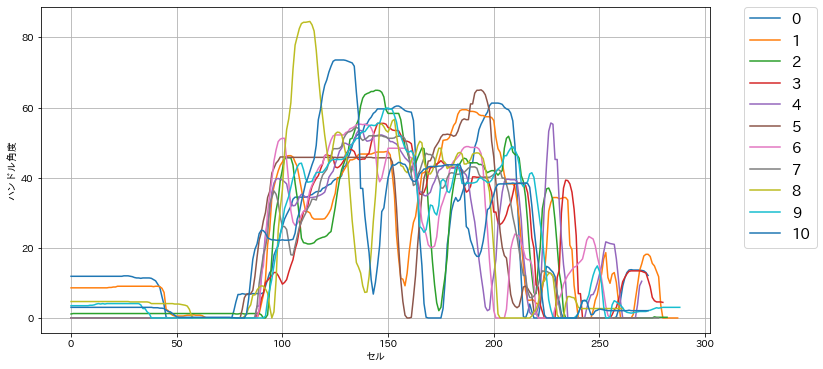

練習走行


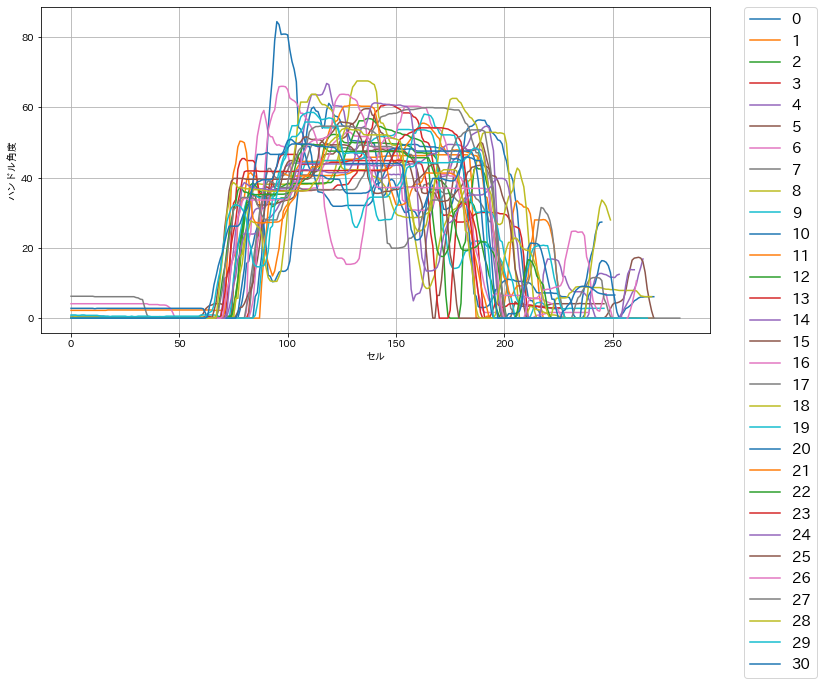

結果走行


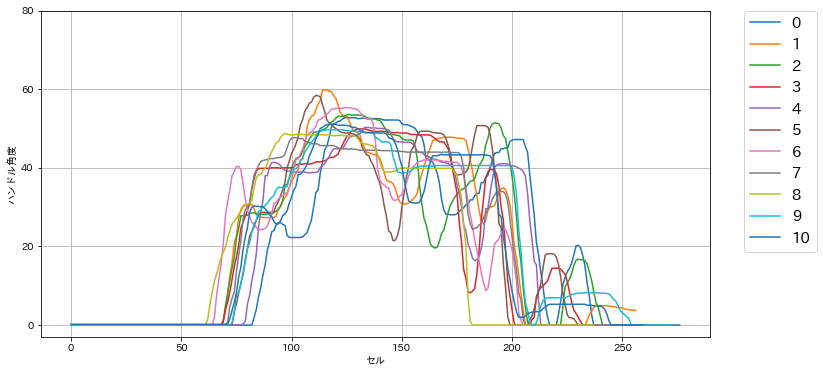

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)

print("ベース走行")
for i in range(len(member[0][9])):
  plt.plot(member[0][9][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.xlabel("セル")
plt.ylabel("ハンドル角度")
plt.grid(True)
plt.yticks([0,20,40,60,80])
plt.show()

print("練習走行")
for i in range(len(member[0][15])):
  plt.plot(member[0][15][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.xlabel("セル")
plt.ylabel("ハンドル角度")
plt.grid(True)
plt.yticks([0,20,40,60,80])
plt.show()

print("結果走行")
for i in range(len(member[0][21])):
  plt.plot(member[0][21][i],label=str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.xlabel("セル")
plt.ylabel("ハンドル角度")
plt.grid(True)
plt.yticks([0,20,40,60,80])

plt.show()

[13, 21, 19, 16, 17, 11, 12, 19, 18, 30, 20]
[9, 8, 9, 11, 5, 7, 7, 7, 9, 7, 7]


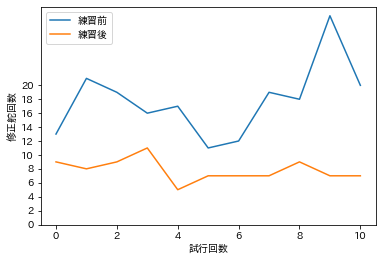

練習前19.6
練習後8.6


In [ ]:
print(member[0][4])
print(member[0][16])
plt.plot(member[0][4],label="練習前")
plt.plot(member[0][16],label="練習後")
plt.legend()
plt.xlabel("試行回数")
plt.ylabel("修正舵回数")
plt.xticks([0,2,4,6,8,10],[0,2,4,6,8,10])
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

print("練習前"+str(sum(member[0][4])/10))
print("練習後"+str(sum(member[0][16])/10))

[18, 6, 13, 13, 17, 15, 9, 16, 19, 23, 12, 11, 5, 11, 19, 13, 7, 11, 8, 7, 10, 5, 8, 5, 10, 11, 17, 6, 10, 15, 6]


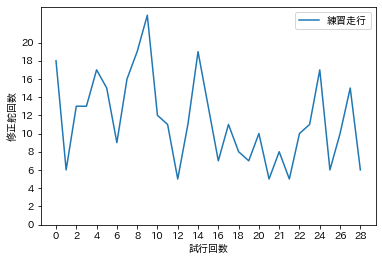

練習走行11.866666666666667


In [ ]:
print(member[0][10])
plt.plot(member[0][10],label="練習走行")
plt.legend()
plt.xlabel("試行回数")
plt.ylabel("修正舵回数")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],[0,2,4,6,8,10,12,14,16,18,20,21,22,24,26,28,30])
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

print("練習走行"+str(sum(member[0][10])/30))

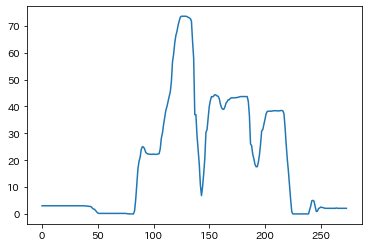

In [ ]:

plt.plot(abshandle)